In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:

# Función para procesar un dataset y hacer predicciones
def process_dataset(data_train, data_test=None, dataset_name="Dataset 1"):
    global results
    scaler = StandardScaler()
    data_train_scaled = scaler.fit_transform(data_train)
    
    if data_test is not None:
        data_test_scaled = scaler.transform(data_test)  # Usar el mismo scaler
    
    for n_components in reductions:
        pca = PCA(n_components=n_components)
        data_train_pca = pca.fit_transform(data_train_scaled)
        
        if data_test is not None:
            data_test_pca = pca.transform(data_test_scaled)  # Usar el mismo PCA
        
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                
                # Entrenar DBSCAN solo con el primer dataset
                clusters_train = dbscan.fit_predict(data_train_pca)
                num_anomalies_train = np.sum(clusters_train == -1)  # -1 indica anomalías
                
                # Guardar resultados para el dataset de entrenamiento
                results.append({
                    "Dataset": f"{dataset_name} (Entrenamiento)",
                    "Reducción (PCA)": n_components,
                    "eps": eps,
                    "min_samples": min_samples,
                    "Anomalías Detectadas": num_anomalies_train
                })
                
                # Si hay un dataset de prueba, hacer predicciones
                if data_test is not None:
                    # Usar el mismo modelo ajustado para predecir en el dataset de prueba
                    clusters_test = dbscan.fit_predict(data_test_pca)
                    num_anomalies_test = np.sum(clusters_test == -1)  # -1 indica anomalías
                    
                    # Guardar resultados para el dataset de prueba
                    results.append({
                        "Dataset": f"{dataset_name} (Predicción)",
                        "Reducción (PCA)": n_components,
                        "eps": eps,
                        "min_samples": min_samples,
                        "Anomalías Detectadas": num_anomalies_test
                    })

In [3]:

# Configuración de parámetros
reductions = [2, 3, 5, 10, 50, 100]  # Número de componentes principales
eps_values = [1, 3, 5, 10]  # Valores de epsilon para DBSCAN
min_samples_values = [3, 5, 10, 20]  # Valores de min_samples para DBSCAN

# DataFrame para almacenar resultados
results = []

In [4]:

# Cargar el dataset
# Asegúrate de reemplazar 'tu_dataset.csv' con la ruta a tu archivo
data1 = pd.read_csv('perfcounters_normal_running.csv', header=None)
data1 = data1.drop(columns=[data1.columns[0]])

use_second_dataset = True  # Cambia a False si no quieres usar el segundo dataset
if use_second_dataset:
    data2 = pd.read_csv('perfcounters_anomalies_running.csv', header=None)
    data2 = data2.drop(columns=[data2.columns[0]])


In [5]:

# Procesar el primer dataset como entrenamiento y el segundo para predicciones (opcional)
dataset_name = "Dataset 1"
process_dataset(data1, data2 if use_second_dataset else None, dataset_name)

In [6]:

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Mostrar resultados en tablas
print("Resultados de la detección de anomalías:")
print(results_df)

Resultados de la detección de anomalías:
                       Dataset  Reducción (PCA)  eps  min_samples  \
0    Dataset 1 (Entrenamiento)                2    1            3   
1       Dataset 1 (Predicción)                2    1            3   
2    Dataset 1 (Entrenamiento)                2    1            5   
3       Dataset 1 (Predicción)                2    1            5   
4    Dataset 1 (Entrenamiento)                2    1           10   
..                         ...              ...  ...          ...   
187     Dataset 1 (Predicción)              100   10            5   
188  Dataset 1 (Entrenamiento)              100   10           10   
189     Dataset 1 (Predicción)              100   10           10   
190  Dataset 1 (Entrenamiento)              100   10           20   
191     Dataset 1 (Predicción)              100   10           20   

     Anomalías Detectadas  
0                      87  
1                     349  
2                     120  
3                 

In [7]:

# Exportar resultados a un archivo CSV (opcional)
results_df.to_csv("dbscan_results_with_predictions.csv", index=False)

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

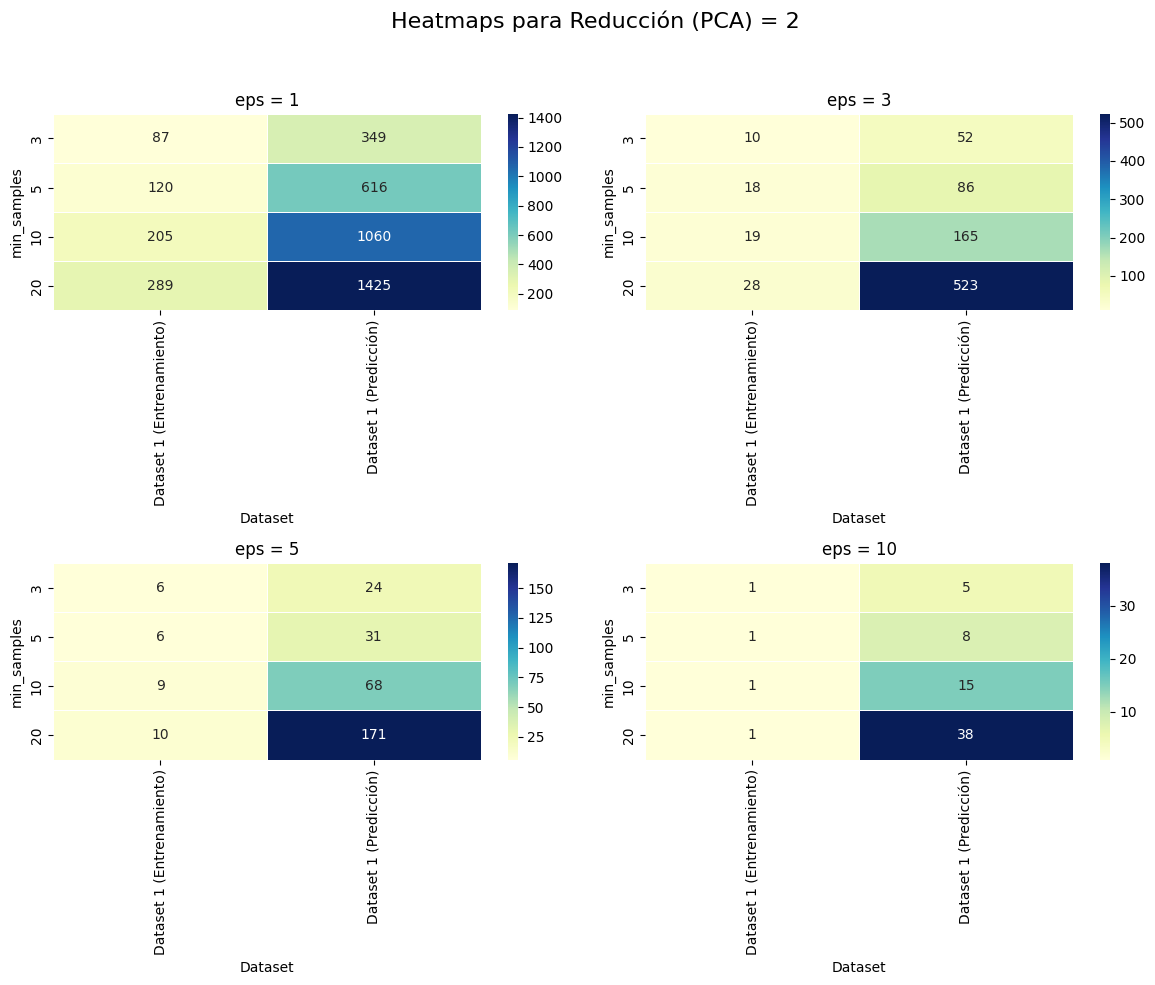

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

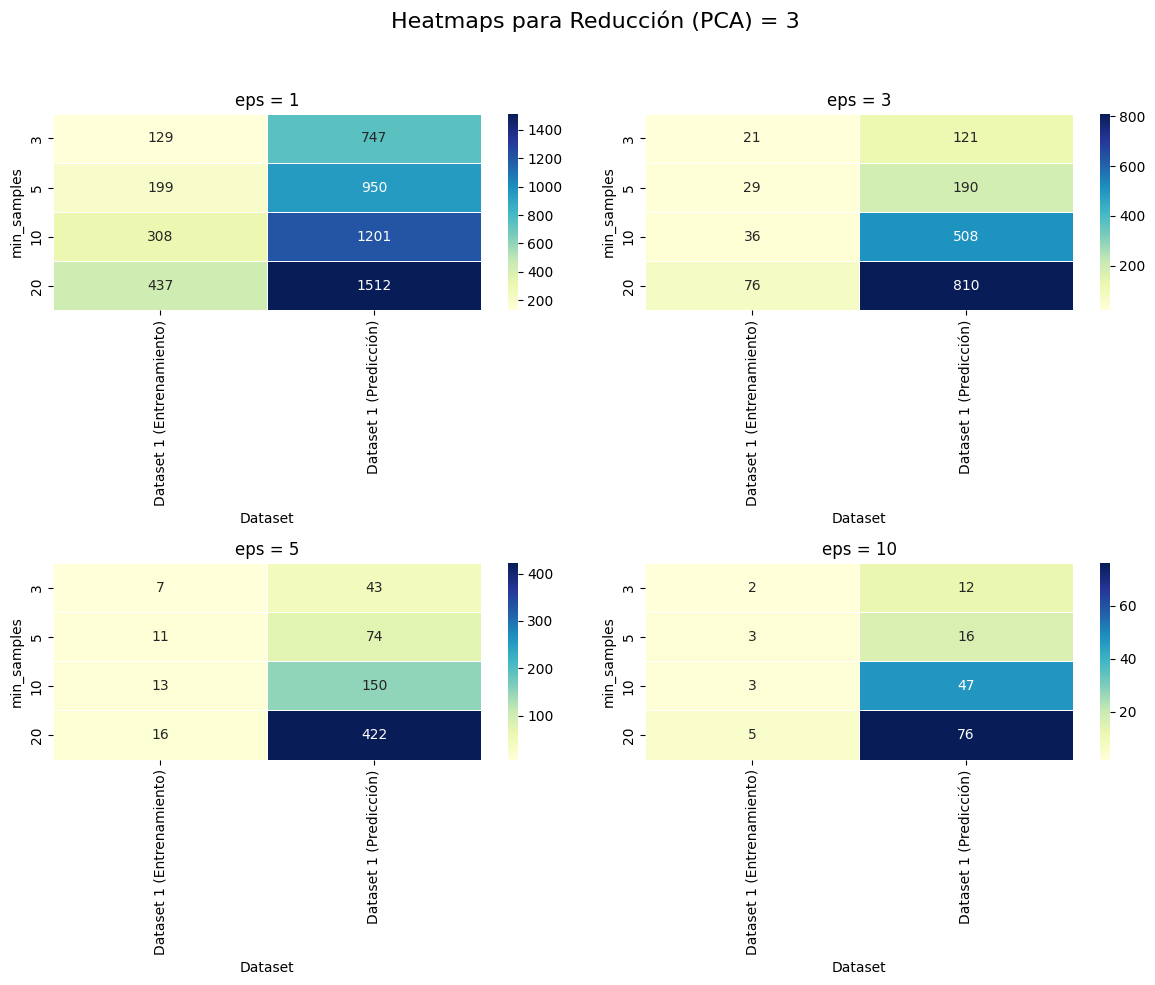

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

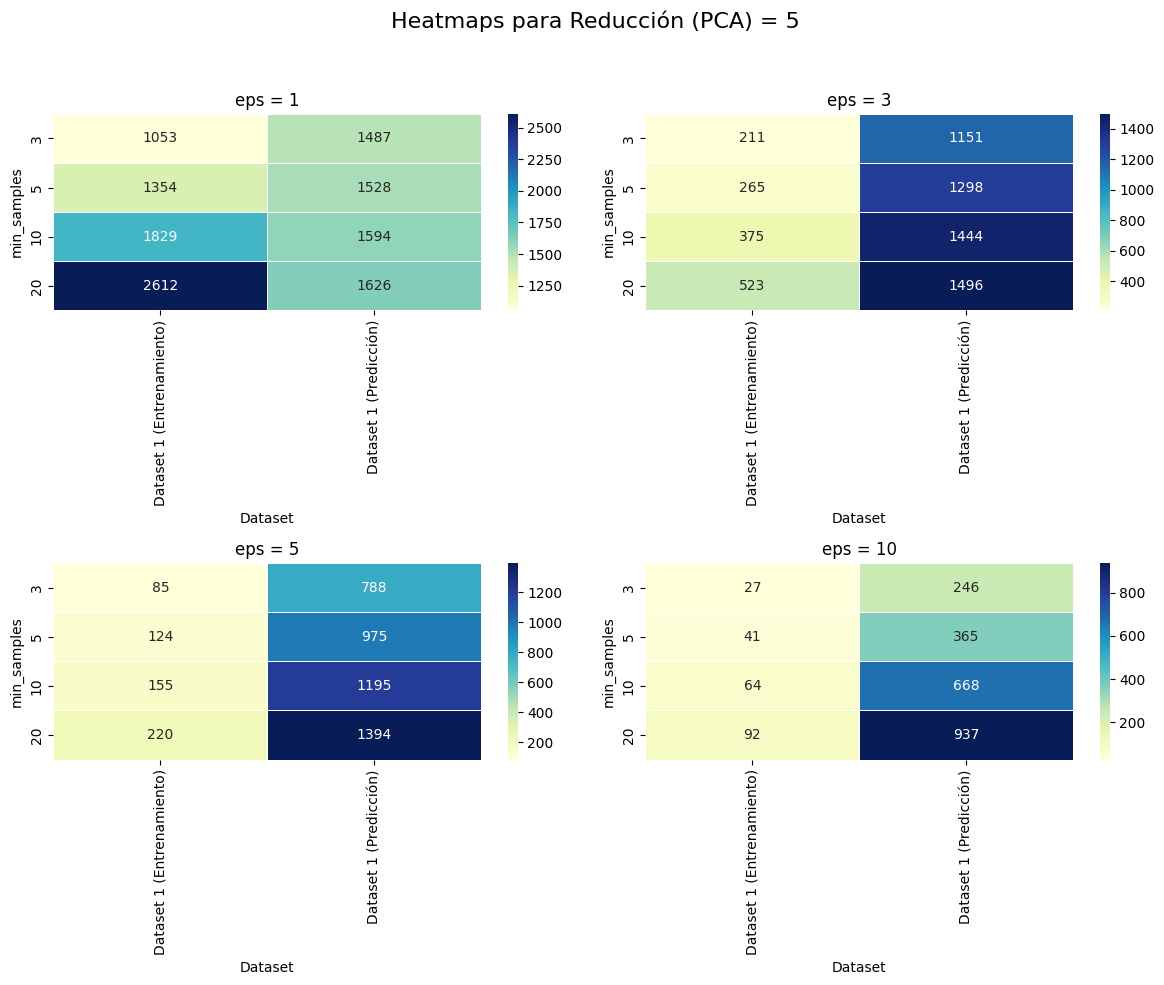

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

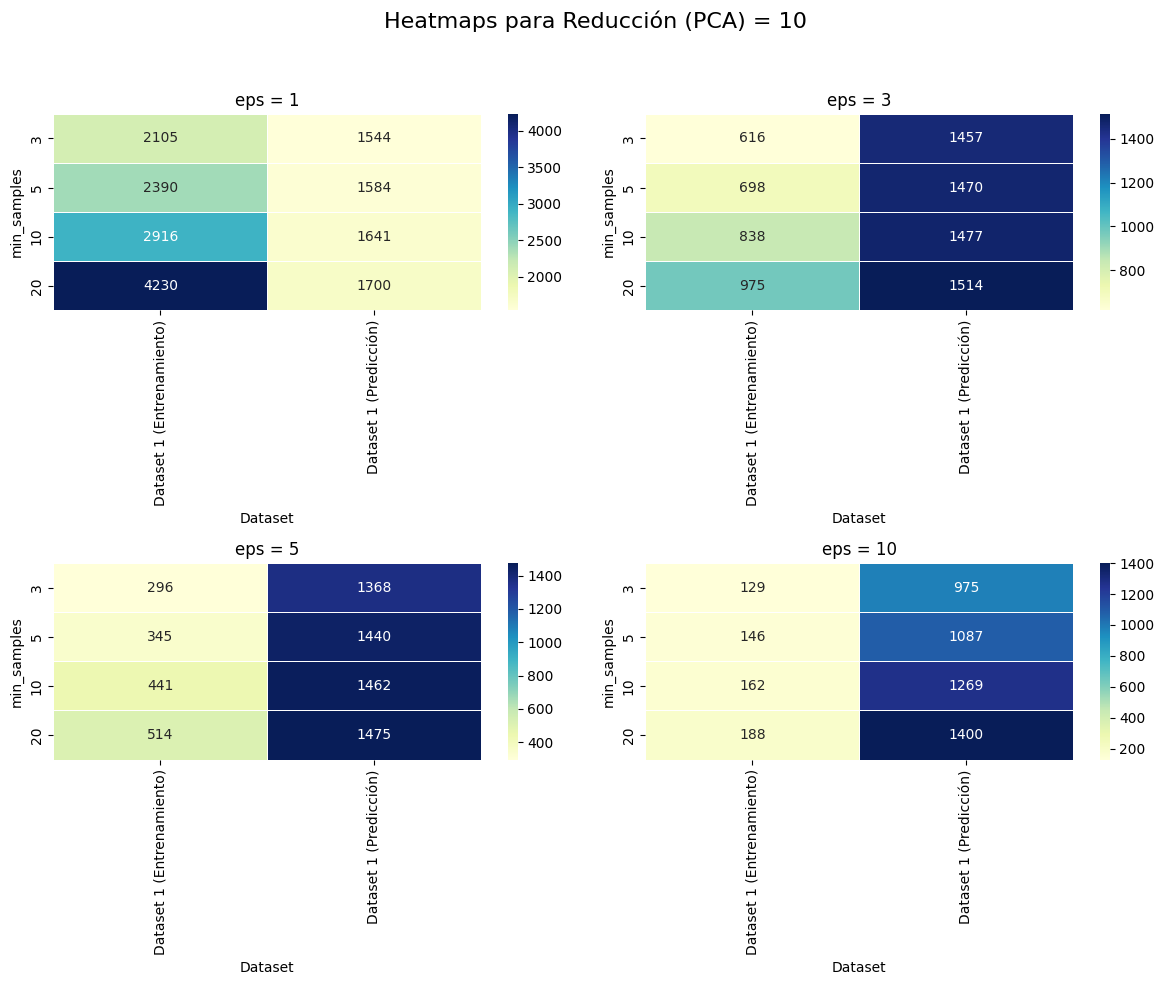

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

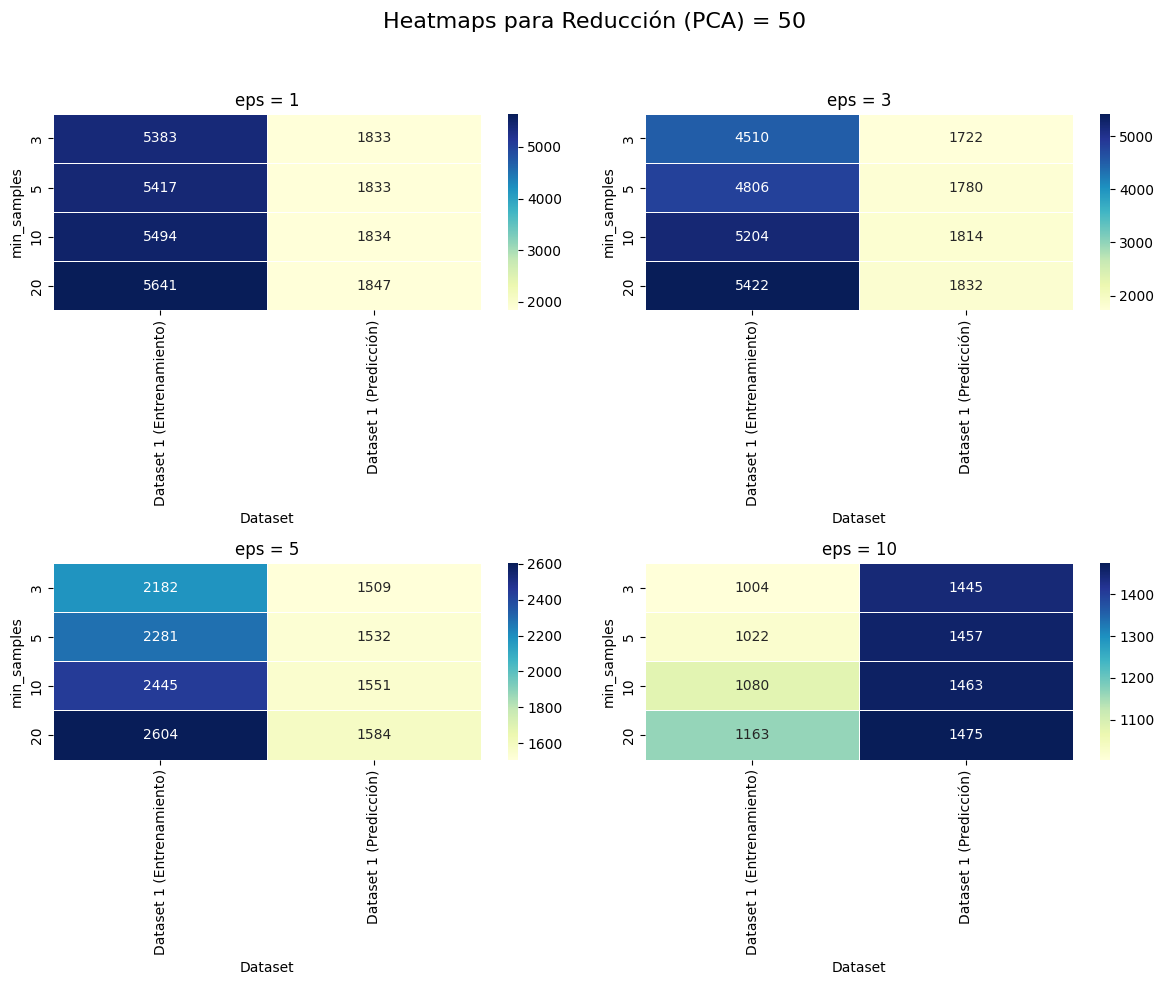

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = eps_df.pivot_table(
/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/1815007605.py:17: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep

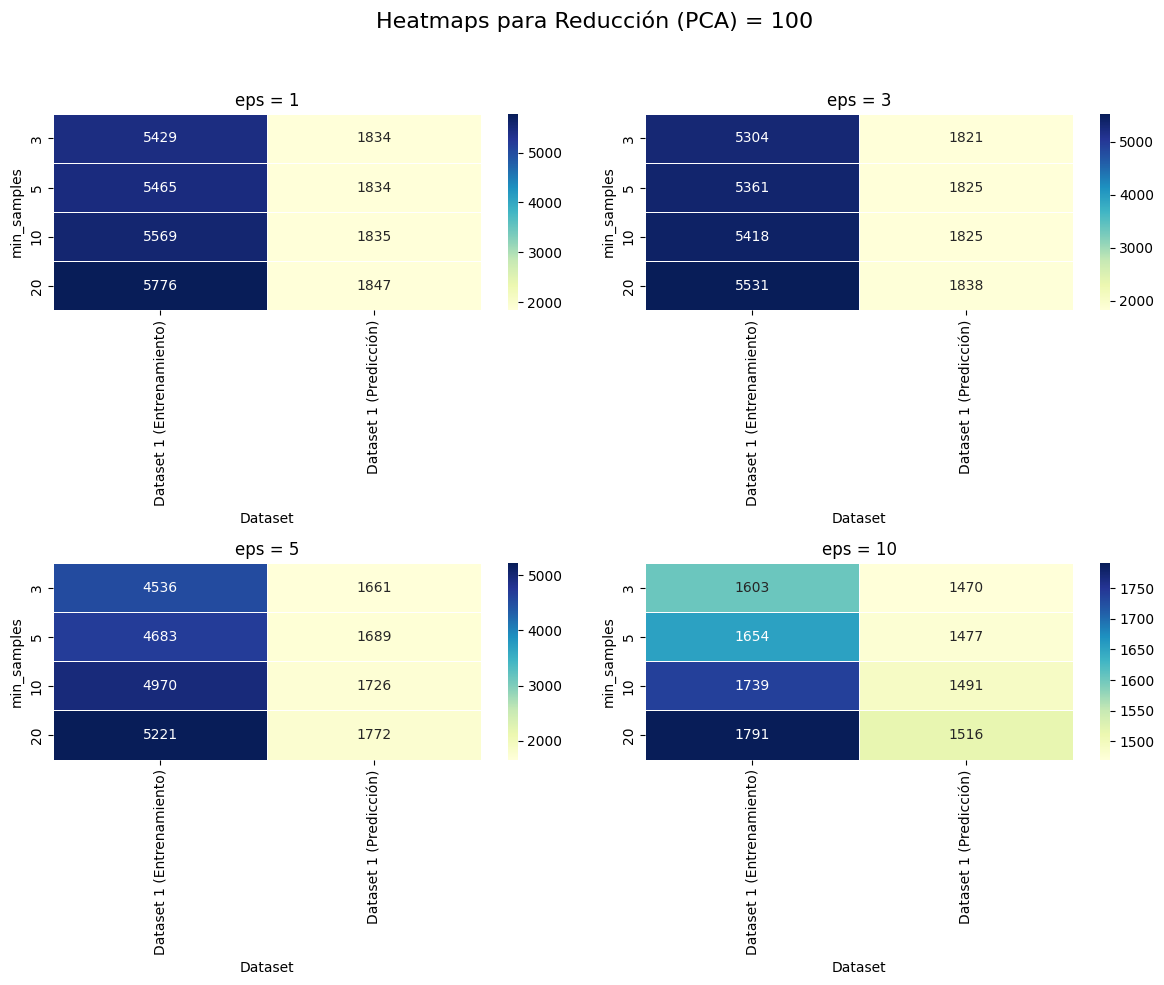

In [8]:

# Visualización Gráfica
for reduction in reductions:
    #Filtramos el dataframe para la reducción actual
    filtered_df = results_df[results_df["Reducción (PCA)"] == reduction]
    
    # Crear una figura con 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Heatmaps para Reducción (PCA) = {reduction}", fontsize=16)
    axes = axes.flatten()  # Aplanar la matriz de ejes
    
    # Iterar sobre los valores de eps y crear un heatmap por cada subplot
    for i, eps in enumerate(eps_values):
        # Filtrar el DataFrame para el valor de eps actual
        eps_df = filtered_df[filtered_df["eps"] == eps]
        
        # Crear una tabla pivote para el heatmap
        pivot_table = eps_df.pivot_table(
            index="min_samples",
            columns="Dataset",
            values="Anomalías Detectadas",
            aggfunc=np.mean
        )
        
        # Crear el heatmap en el subplot correspondiente
        sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, ax=axes[i])
        axes[i].set_title(f"eps = {eps}")
        axes[i].set_xlabel("Dataset")
        axes[i].set_ylabel("min_samples")
    
    # Ocultar los subplots vacíos (si hay menos de 4 heatmaps)
    for j in range(len(eps_values), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar diseño para el título
    plt.show()

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


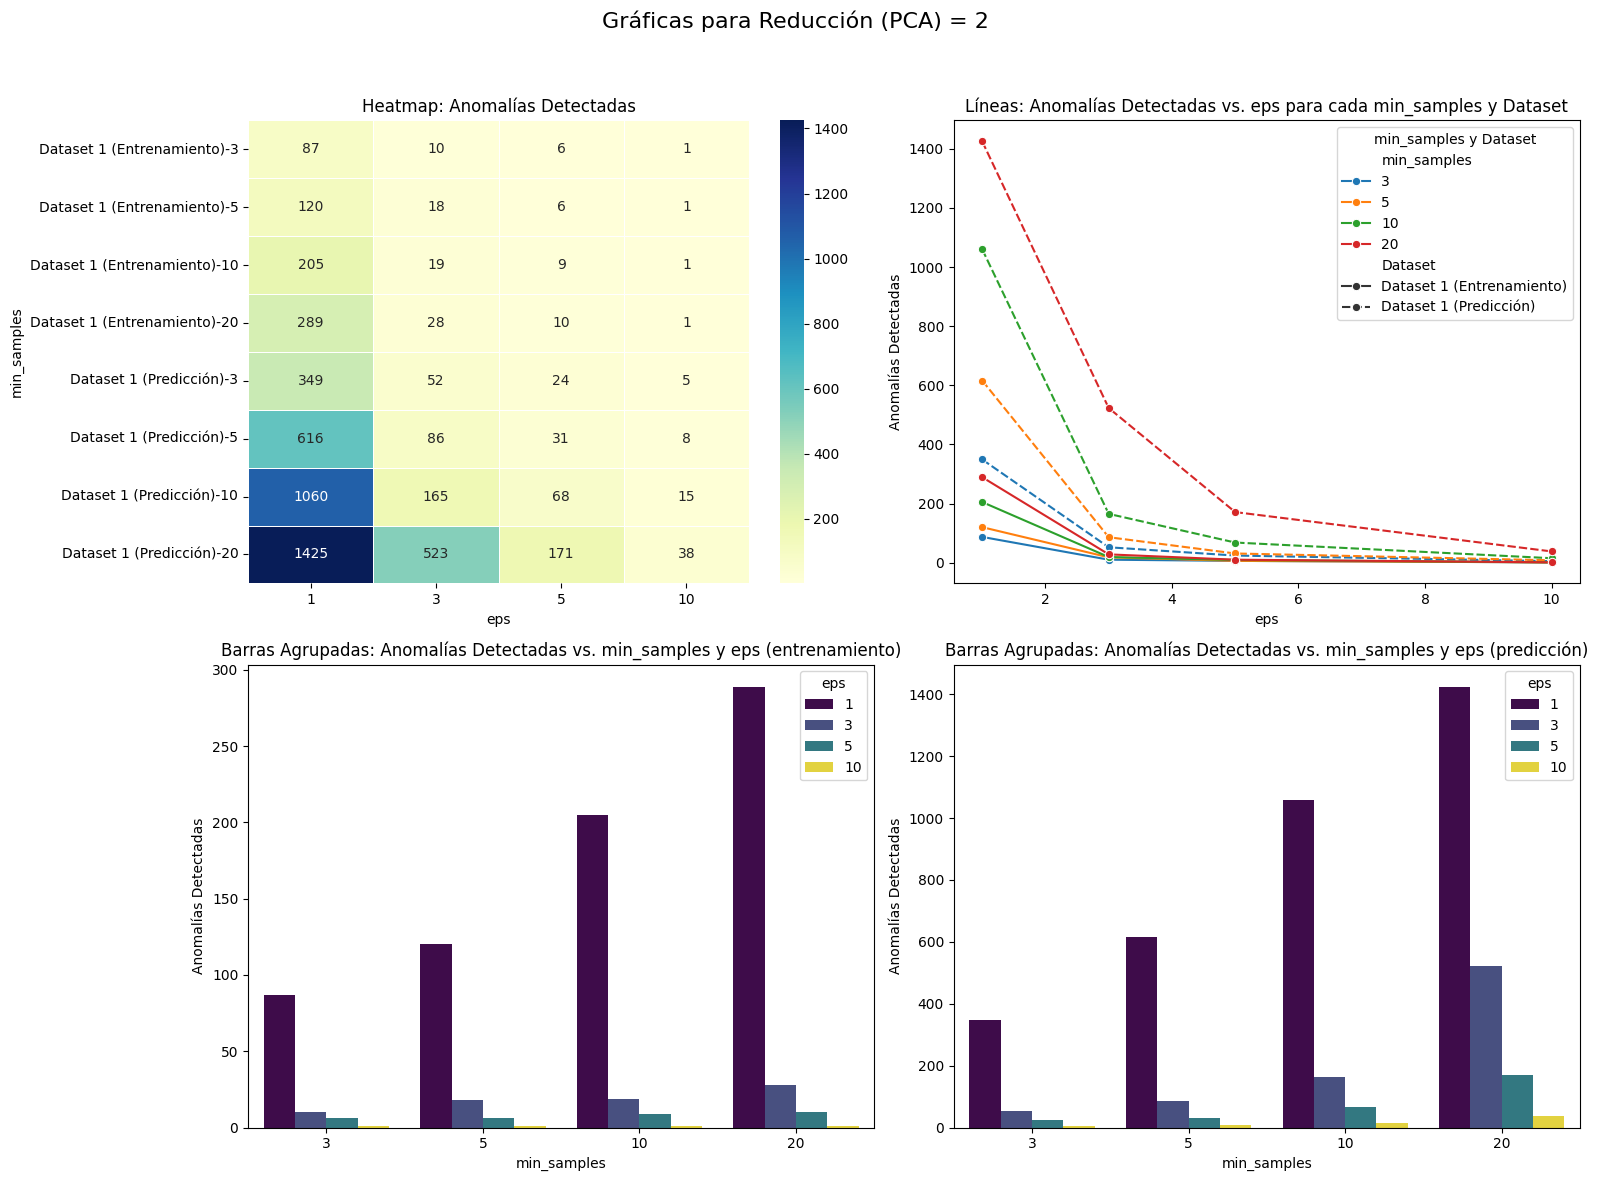

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


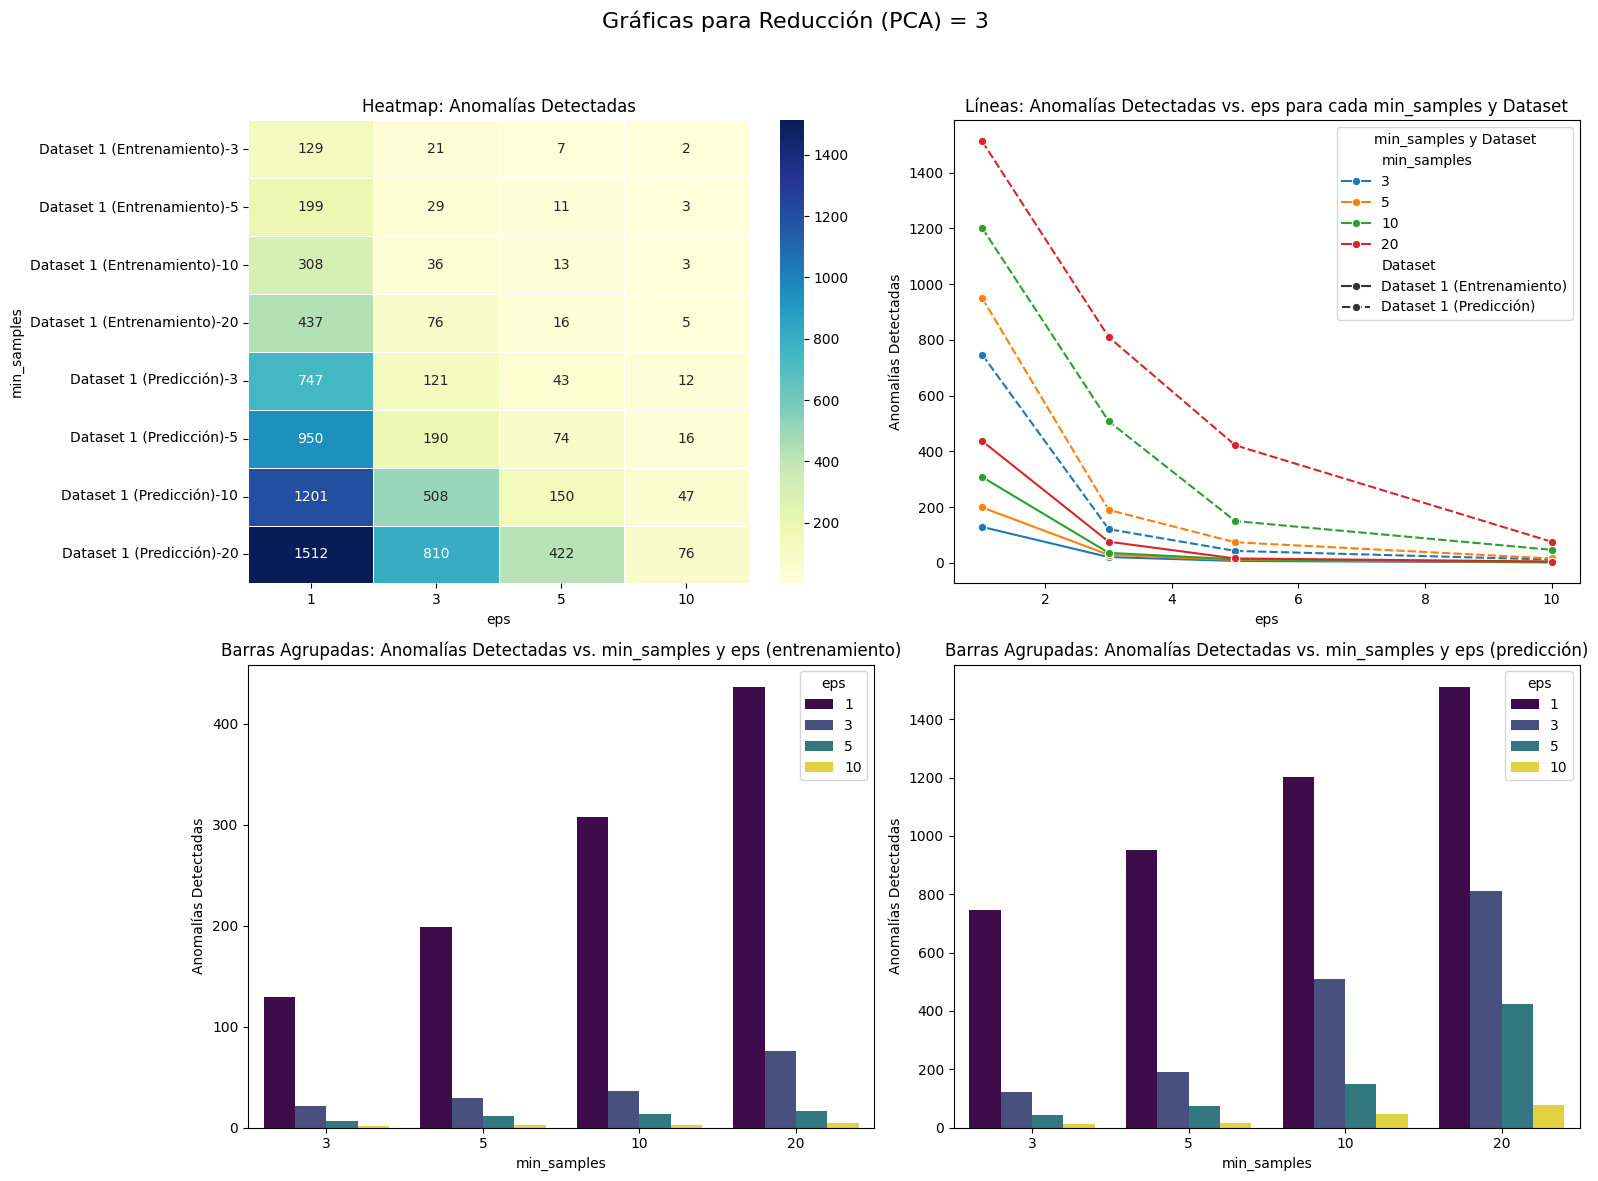

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


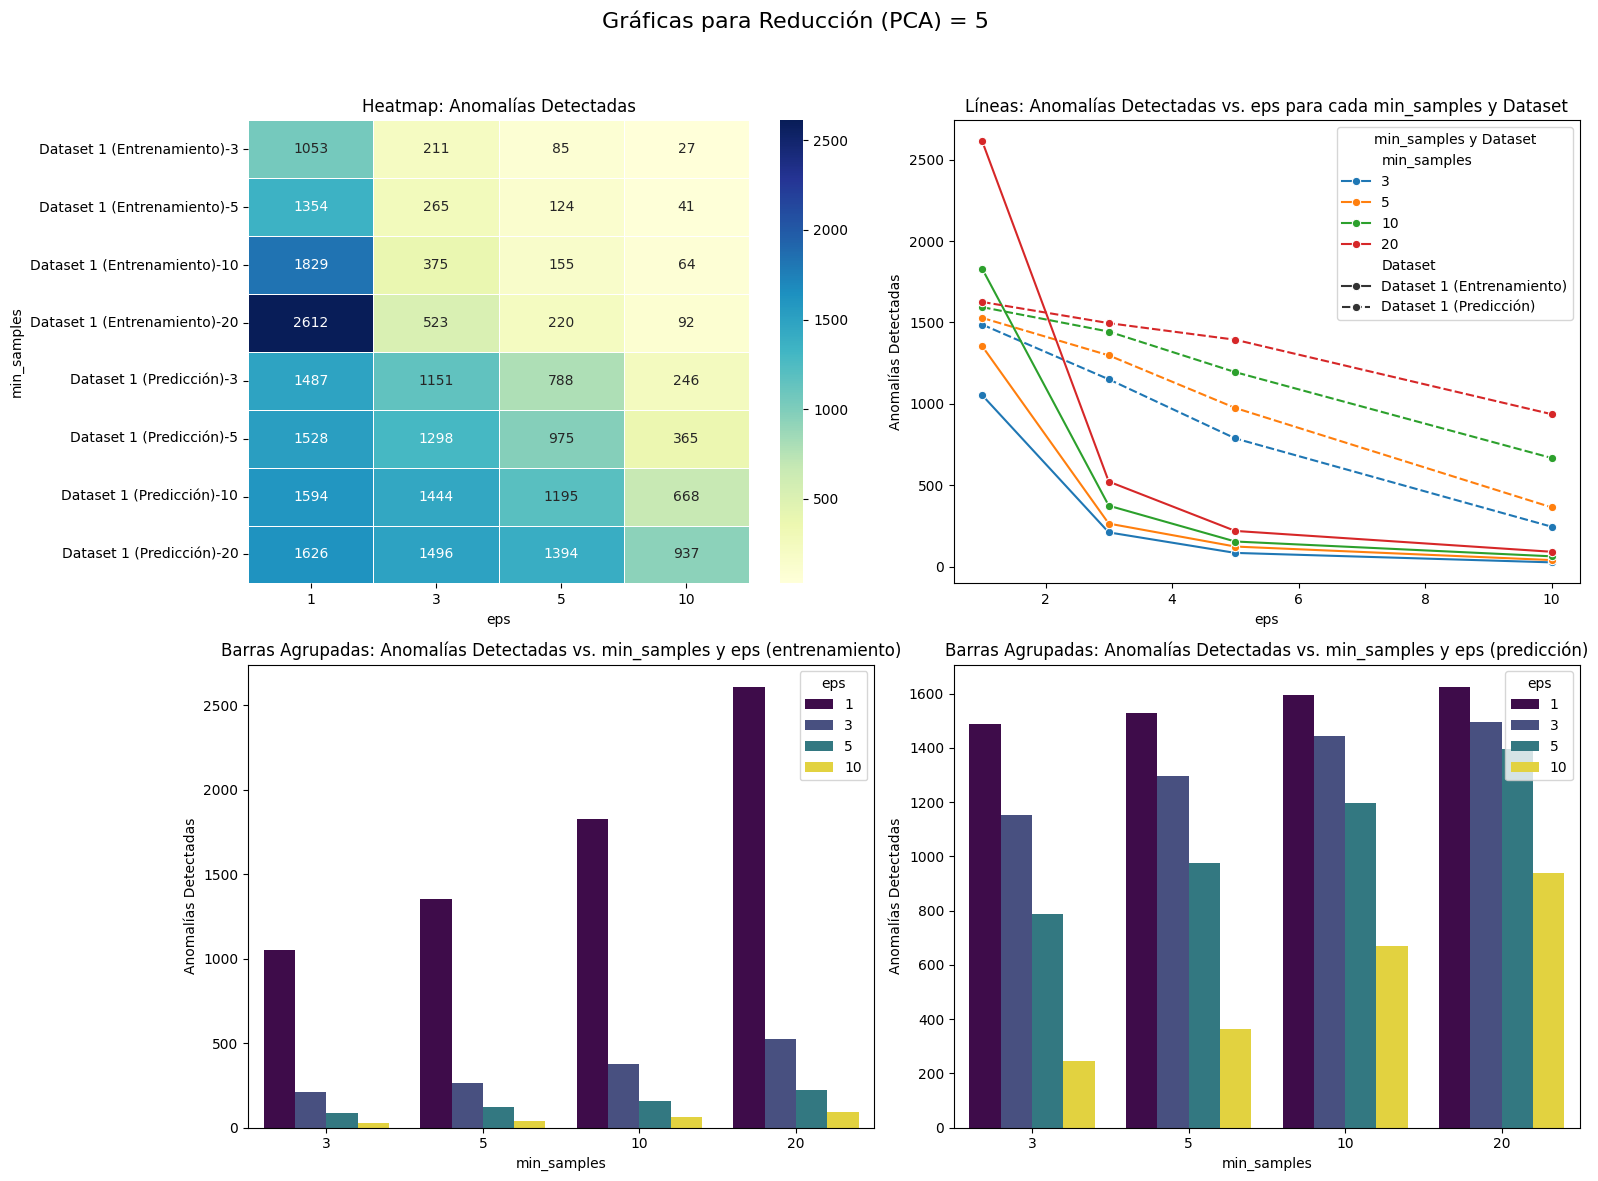

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


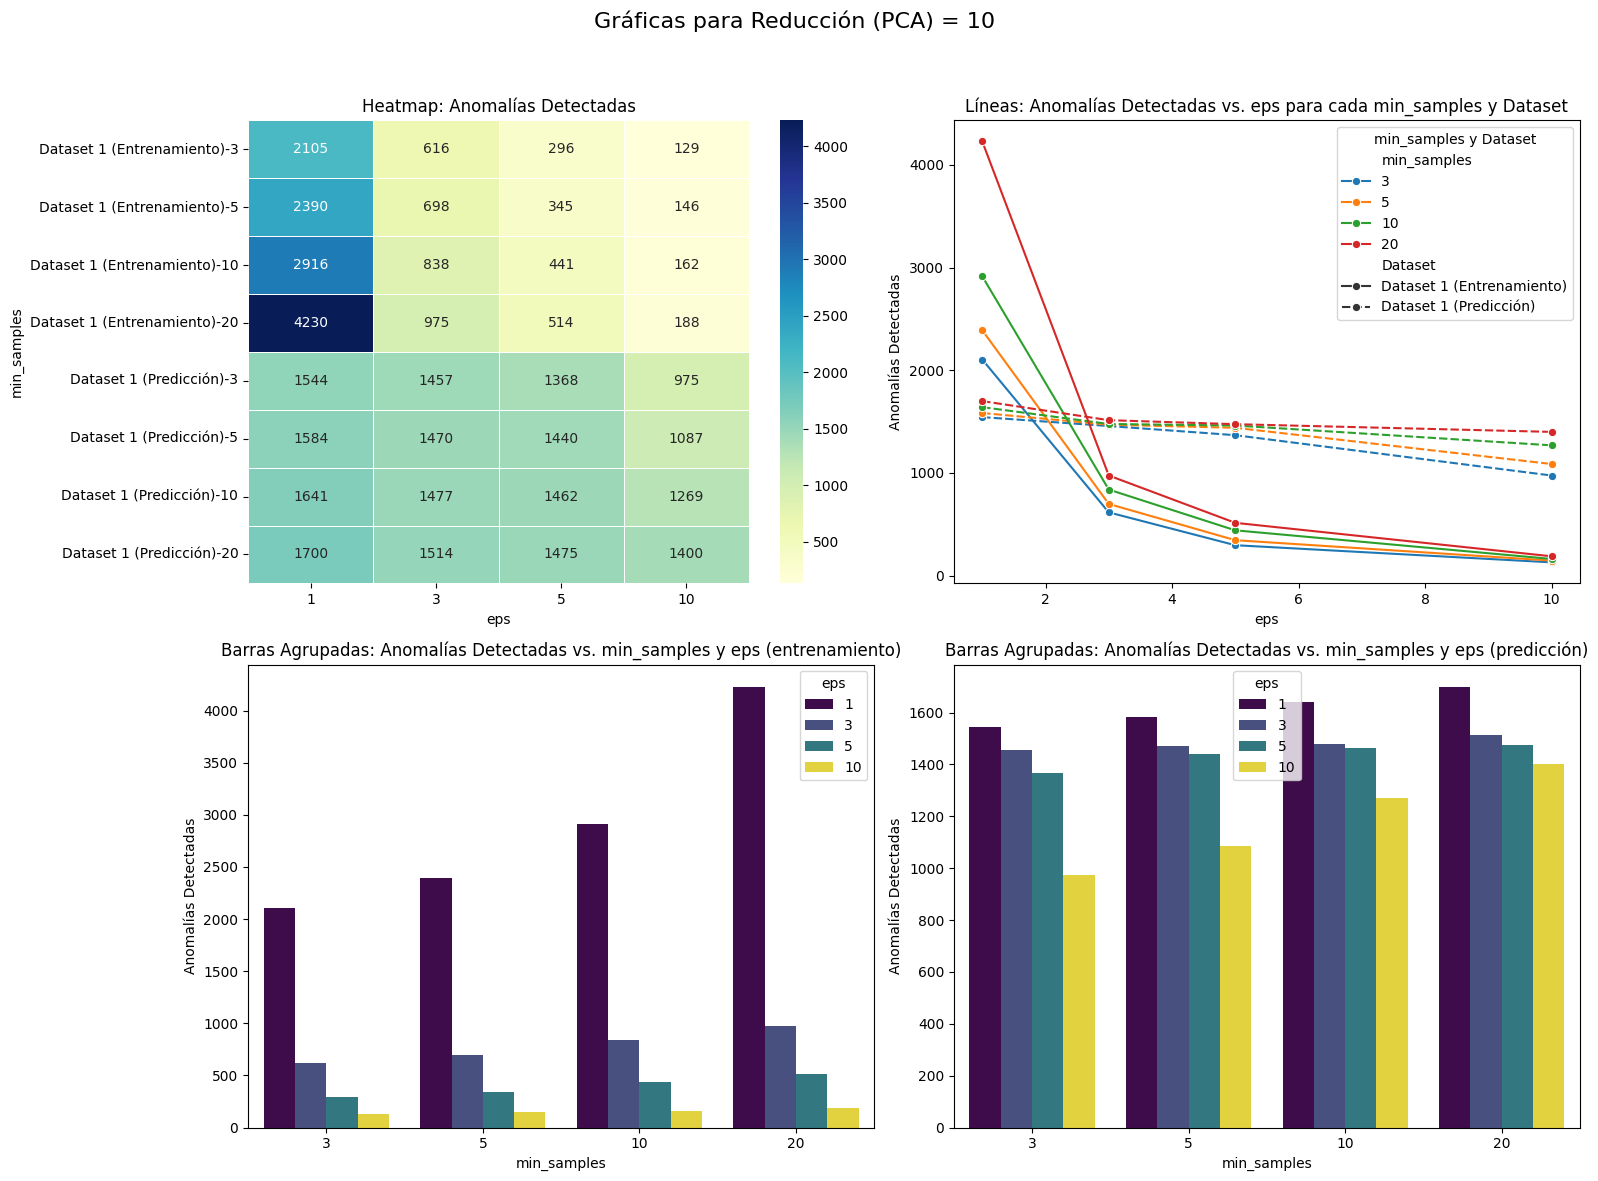

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


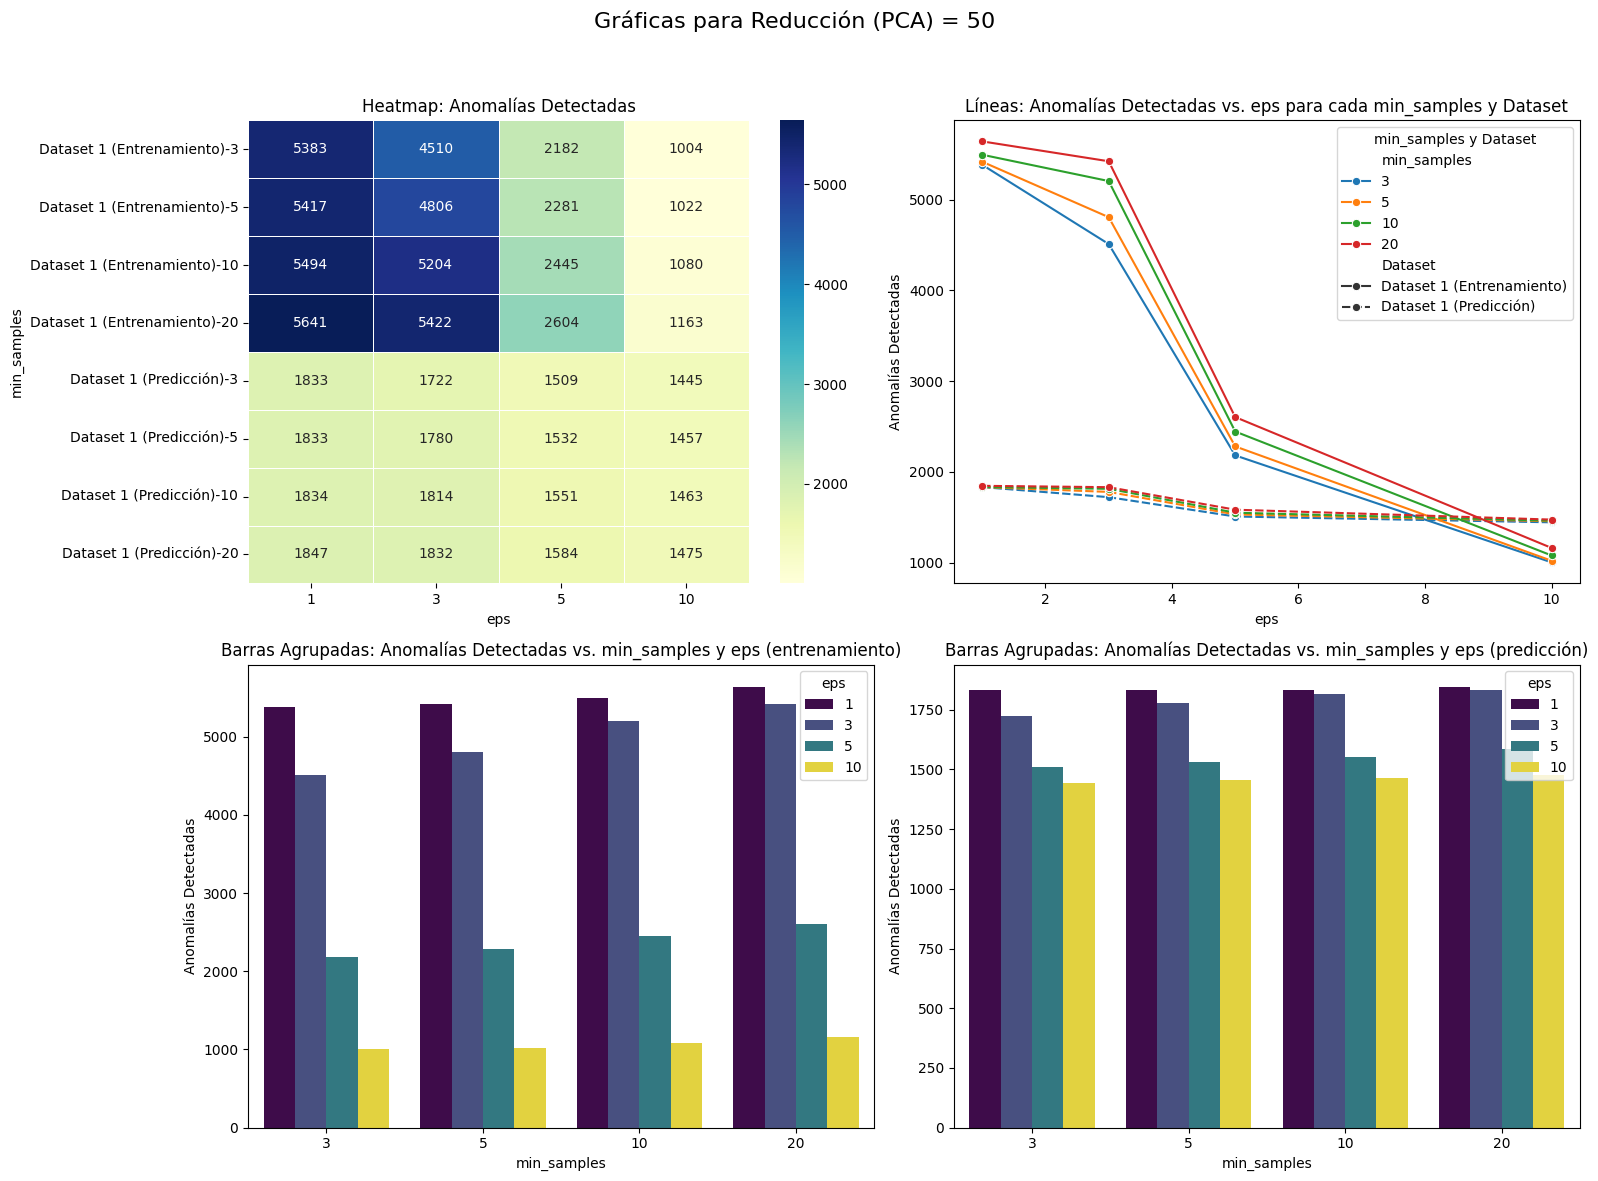

/var/folders/pd/nk6h4pzn3797ndwvjf5528c80000gp/T/ipykernel_95538/3575471374.py:15: FutureWarning: The provided callable <function mean at 0x105b03d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = filtered_df.pivot_table(


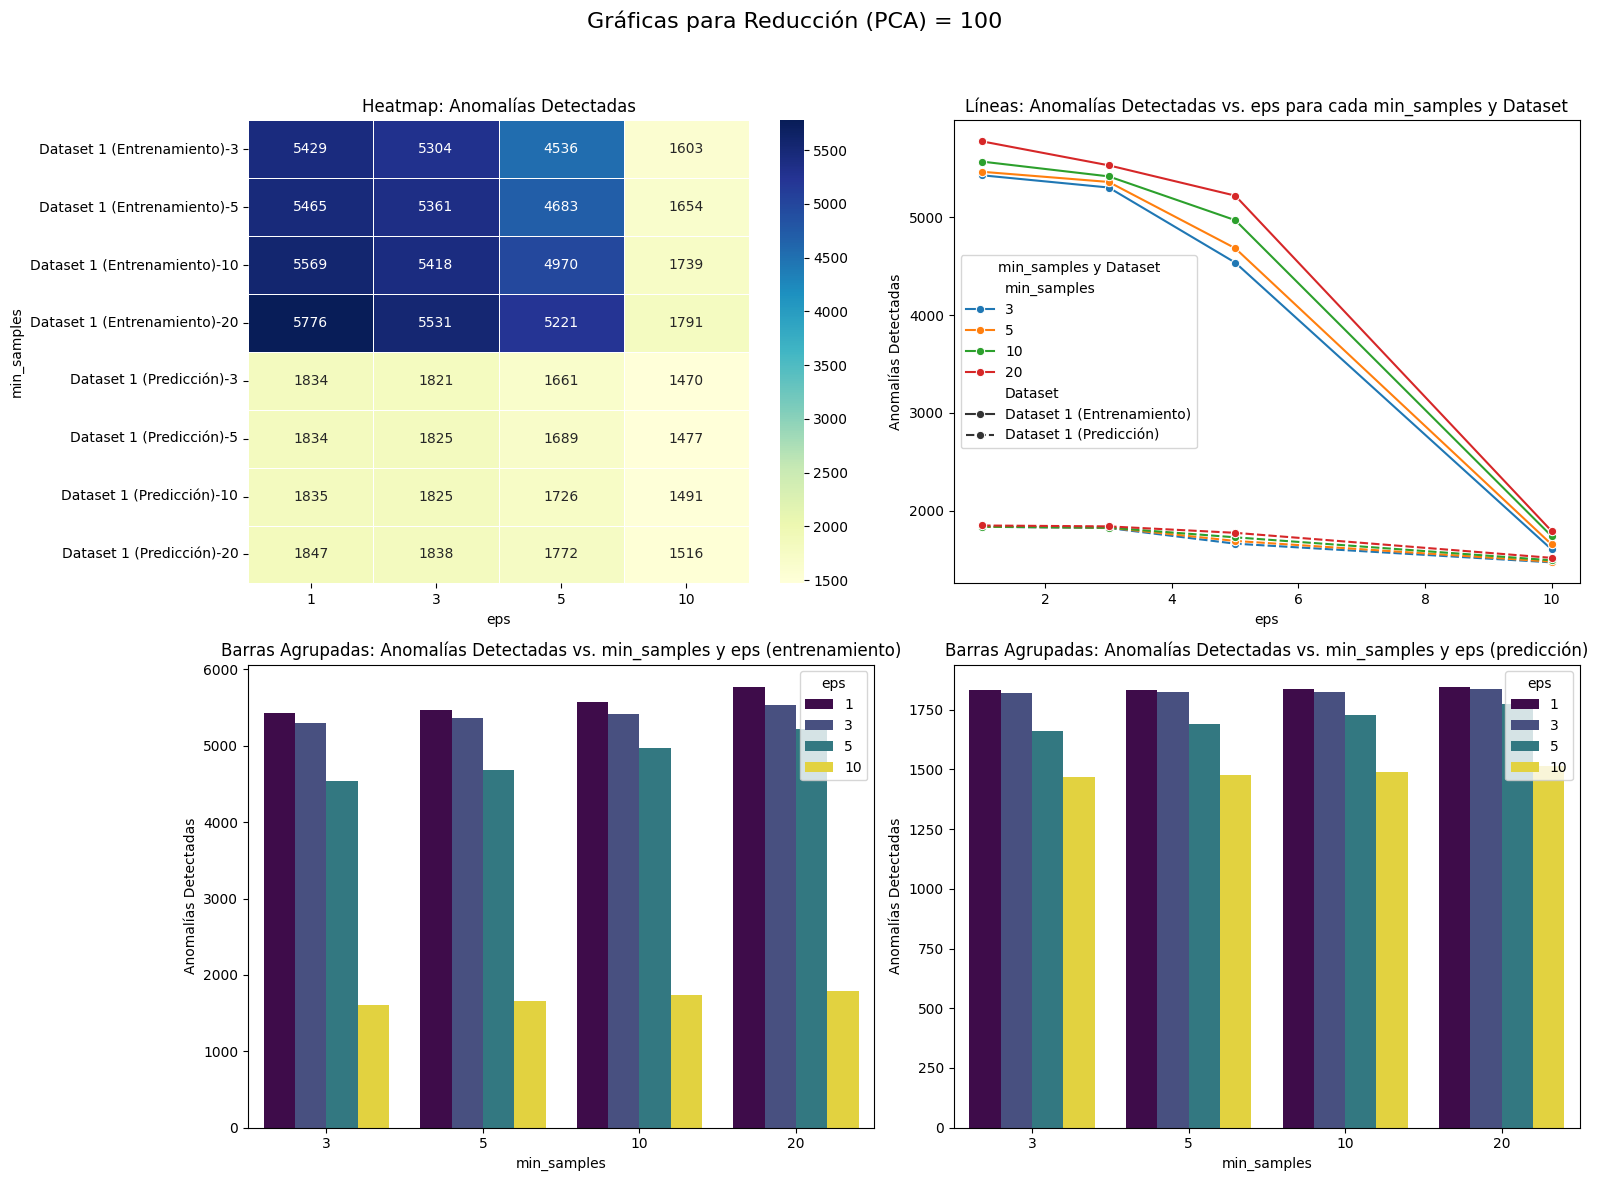

In [11]:

# Visualización Gráfica
dataset_name="Dataset 1"
for reduction in reductions:
    #Filtramos el dataframe para la reducción actual
    filtered_df = results_df[results_df["Reducción (PCA)"] == reduction]
    filtered_df_entrenamiento = filtered_df[filtered_df["Dataset"] == "Dataset 1 (Entrenamiento)"]
    filtered_df_prediction = filtered_df[filtered_df["Dataset"] == "Dataset 1 (Predicción)"]

    # Crear una figura con 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f"Gráficas para Reducción (PCA) = {reduction}", fontsize=16)
    axes = axes.flatten()  # Aplanar la matriz de ejes
    
    # Heatmap
    heatmap_data = filtered_df.pivot_table(
        index=["Dataset","min_samples"],
        columns="eps",
        values="Anomalías Detectadas",
        aggfunc=np.mean
    )
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, ax=axes[0])
    axes[0].set_title("Heatmap: Anomalías Detectadas")
    axes[0].set_xlabel("eps")
    axes[0].set_ylabel("min_samples")

    # Gráfico de Líneas
    sns.lineplot(
        data=filtered_df,
        x="eps",
        y="Anomalías Detectadas",
        hue="min_samples",
        style="Dataset",
        marker="o",
        palette="tab10",
        ax=axes[1]
    )
    axes[1].set_title("Líneas: Anomalías Detectadas vs. eps para cada min_samples y Dataset")
    axes[1].set_xlabel("eps")
    axes[1].set_ylabel("Anomalías Detectadas")
    axes[1].legend(title="min_samples y Dataset")
    
    
    # Gráfico de Barras Agrupadas
    sns.barplot(
        data=filtered_df_entrenamiento,
        x="min_samples",
        y="Anomalías Detectadas",
        hue="eps",
        errorbar=None,
        palette="viridis",
        ax=axes[2]
    )
    axes[2].set_title("Barras Agrupadas: Anomalías Detectadas vs. min_samples y eps (entrenamiento)")
    axes[2].set_xlabel("min_samples")
    axes[2].set_ylabel("Anomalías Detectadas")
    axes[2].legend(title="eps")
    

    # Gráfico de Barras Agrupadas
    sns.barplot(
        data=filtered_df_prediction,
        x="min_samples",
        y="Anomalías Detectadas",
        hue="eps",
        errorbar=None,
        palette="viridis",
        ax=axes[3]
    )
    axes[3].set_title("Barras Agrupadas: Anomalías Detectadas vs. min_samples y eps (predicción)")
    axes[3].set_xlabel("min_samples")
    axes[3].set_ylabel("Anomalías Detectadas")
    axes[3].legend(title="eps")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar diseño para el título
    plt.savefig(f"dbscan_{reduction}.png")
    plt.show()